### Load in data and libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataset/prepared_data.csv", sep=";")

# remove world data
data = data[data['country'] != 'World']

### Error calculation for linear regression

In [61]:
# Get the GDP and CO2 data
gdp = data["gdp"]
co2 = data["co2"]

def simple_linear_regresssion(input_feature,output):
    xi = input_feature
    yi = output
    n = len(xi)

    xi_mean = np.mean(xi)
    yi_mean = np.mean(yi)

    product_xy = np.sum(xi*yi)
    xy_by_n = (np.sum(xi)*np.sum(yi))/n

    xi_square = np.sum(xi**2)
    xi_square_by_n = (np.sum(xi)**2)/n

    slope = (product_xy - xy_by_n)/(xi_square - xi_square_by_n)
    intercept = yi_mean - slope*xi_mean

    return (intercept, slope)

intercept, slope = simple_linear_regresssion(gdp, co2)

def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + slope*input_feature
    return predicted_output

ypred = get_regression_predictions(gdp, intercept, slope)

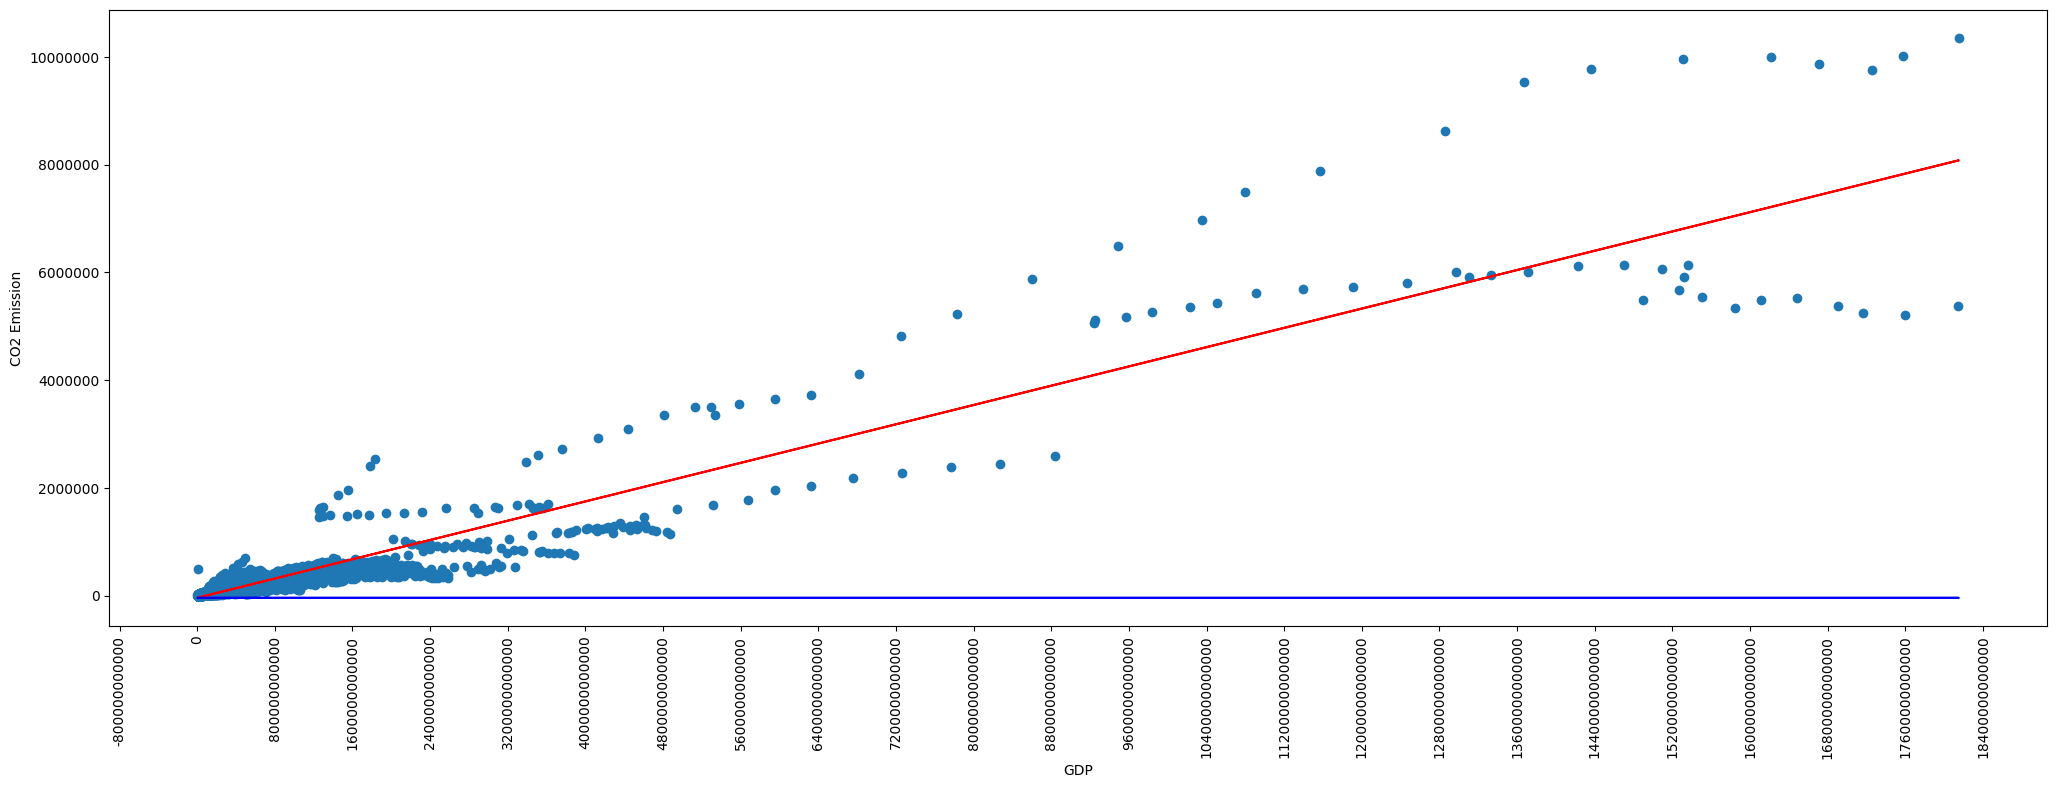

In [62]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Define a formatter function to display full precision
def precision_formatter(x, pos):
    return f'{x:.0f}'  # Adjust the precision as needed

plt.figure(figsize=(25, 8))

blub = np.log(gdp)

# Plot the data
plt.scatter(gdp, co2)
plt.plot(gdp,slope*gdp+intercept, color='red', label="Linear Regression")
plt.plot(gdp, slope*blub+intercept, color='blue', label="Logarithmic Regression")
plt.xlabel("GDP")
plt.ylabel("CO2 Emission")

# Apply the formatter to the x-axis and y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(precision_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(precision_formatter))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=30))

# Turn the axis
plt.xticks(rotation=90)

# Show the plot
plt.show()

### All Calculations To Check Linearity

#### Residual Sum Of Squares

In [63]:
# ! Residual Sum of Squares
# ? A lower RSS indicates a better fit, as it means the model's predictions are closer to the true values.
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept
    residuals = output - predicted_output
    RSS = (residuals*residuals).sum()
    return RSS

rss = get_residual_sum_of_squares(gdp, co2, intercept, slope)
print(f"Residual Sum of Squares: {rss}")

# RSS for baseline model
mean_output = co2.mean()
baseline_rss = ((co2 - mean_output) ** 2).sum()

print(f"Baseline Residual Sum of Squares: {baseline_rss}")

# Compare the RSS of the model with the baseline
if rss < baseline_rss:
    print("The model has a lower RSS than the baseline model.")
else:
    print("The model has a higher RSS than the baseline model.")


Residual Sum of Squares: 266316292554654.62
Baseline Residual Sum of Squares: 2338663022270350.5
The model has a lower RSS than the baseline model.


#### Mean Absolute Error

In [64]:
# ! Mean Absolute Error
# ? A lower MAE indicates a better fit, as it means the average absolute error is smaller.
def mean_absolute_error(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept

    var = (abs(output - predicted_output)).sum()

    return var/len(output)

mae = mean_absolute_error(gdp, co2, intercept, slope)
print(f"Mean Absolute Error: {mae}")

mean_output = co2.mean()
# Calculate the MAE for the baseline model
baseline_mae = abs(co2 - mean_output).mean()

print(f"Baseline Mean Absolute Error: {baseline_mae}")

# Compare the MAE of the model with the baseline
if mae < baseline_mae:
    print("The model has a lower MAE than the baseline model.")
else:
    print("The model has a higher MAE than the baseline model.")


Mean Absolute Error: 107101.37631592993
Baseline Mean Absolute Error: 308031.10422932706
The model has a lower MAE than the baseline model.


#### Mean Squared Error

In [65]:
# ! Mean Squared Error
# ? A lower MSE indicates a better fit, as it means the average squared error is smaller.
def mean_squared_error(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept

    var = ((output - predicted_output)*(output - predicted_output)).sum()

    return var/len(output)

mse = mean_squared_error(gdp, co2, intercept, slope)
print(f"Mean Squared Error: {mse}")

mean_output = co2.mean()

# Calculate the MSE for the baseline model
baseline_mse = ((co2 - mean_output) ** 2).mean()

print(f"Baseline Mean Squared Error: {baseline_mse}")

# Compare the MSE of the model with the baseline
if mse < baseline_mse:
    print("The model has a lower MSE than the baseline model.")
else:
    print("The model has a higher MSE than the baseline model.")

Mean Squared Error: 77688533417.34383
Baseline Mean Squared Error: 682223752120.8723
The model has a lower MSE than the baseline model.


#### Mean Absolute Percentage Error

In [66]:
# ? to avoid division by zero
epsilon = 1e-10

# ! Mean Absolute Percentage Error
# ? A lower MAPE indicates a better fit, as it means the average percentage error is smaller.
def mean_absolute_percentage_error(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept

    var = abs((output - predicted_output)/(output+epsilon)).sum()

    return (var/len(output))*100

mape = mean_absolute_percentage_error(gdp, co2, intercept, slope)
print(f"Mean Absolute Percentage Error: {mape}")

mean_output = co2.mean()

baseline_mape= ((abs((co2 - mean_output) / (co2 + epsilon)).sum())/len(co2))*100
print(f"Baseline Mean Absolute Percentage Error: {baseline_mape}")

# Compare the MAPE of the model with the baseline
if mape < baseline_mape:
    print("The model has a lower MAPE than the baseline model.")
else:
    print("The model has a higher MAPE than the baseline model.")

Mean Absolute Percentage Error: 10852816476559.479
Baseline Mean Absolute Percentage Error: 67404242077921.305
The model has a lower MAPE than the baseline model.


#### Mean Percentage Error

In [67]:
# ? to avoid division by zero
epsilon = 1e-10

# ! Mean Percentage Error
# ? MPE can be positive or negative, indicating systematic overestimation or underestimation.
def mean_percentage_error(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept

    var = ((output - predicted_output)/(output+epsilon)).sum()

    return (var/len(output))*100

mpe = mean_percentage_error(gdp, co2, intercept, slope)
print(f"Mean Percentage Error: {mpe}")

def baseline_mean_percentage_error(output, mean_output):
    var = ((output - mean_output) / (output + epsilon)).sum()
    return (var / len(output)) * 100

# Calculate the mean of the output
mean_output = co2.mean()

# Calculate the MPE for the baseline model
baseline_mpe = baseline_mean_percentage_error(co2, mean_output)

print(f"Baseline Mean Percentage Error: {baseline_mpe}")

# Compare the MPE of the model with the baseline
if abs(mpe) < abs(baseline_mpe):
    print("The model has a lower MPE than the baseline model.")
else:
    print("The model has a higher MPE than the baseline model.")

Mean Percentage Error: 10852816476516.076
Baseline Mean Percentage Error: -67404242077902.02
The model has a lower MPE than the baseline model.


#### Root Mean Squared Error

In [70]:
# ! Root Mean Squared Error
# ? A lower RMSE indicates a better fit.
def root_mean_squared_error(input_feature, output, intercept, slope):
    predicted_output = input_feature*slope + intercept

    var = ((output - predicted_output)*(output - predicted_output)).sum()

    return np.sqrt(var/len(output))

rmse = root_mean_squared_error(gdp, co2, intercept, slope)
print(f"Root Mean Squared Error: {rmse}")


mean_output = co2.mean()

# Calculate the mean of the output
mean_output = co2.mean()

# Calculate the RMSE for the baseline model
baseline_rmse = np.sqrt(((co2 - mean_output) ** 2).mean())
print(f"Baseline Root Mean Squared Error: {baseline_rmse}")

# Compare the RMSE of the model with the baseline
if rmse < baseline_rmse:
    print("The model has a lower RMSE than the baseline model.")
else:
    print("The model has a higher RMSE than the baseline model.")

Root Mean Squared Error: 278726.6284683683
Baseline Root Mean Squared Error: 825968.3723490097
The model has a lower RMSE than the baseline model.


### Hypothesis testing

In [75]:
# we want to try to predict the CO2 emission of a country through GDP
from scipy import stats

# Sample data
gdp = data['gdp']
co2 = data['co2']

mean = gdp.mean()

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(gdp, popmean=mean)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 0.0, p-value: 1.0
